# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv).

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [2]:
online_rt = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv', encoding='latin1')
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

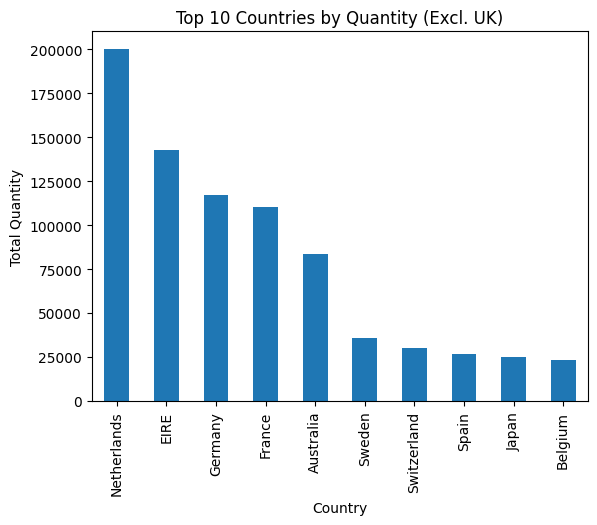

In [3]:
top_countries = online_rt[online_rt['Country'] != 'United Kingdom'].groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Quantity (Excl. UK)')
plt.ylabel('Total Quantity')
plt.show()

### Step 5.  Exclude negative Quantity entries

In [4]:
online_rt = online_rt[online_rt['Quantity'] > 0]

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

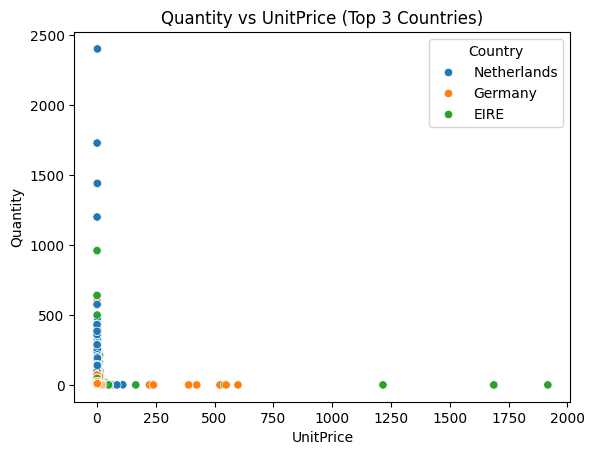

In [7]:
top3 = online_rt[online_rt['Country'] != 'United Kingdom'].groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(3).index
data = online_rt[online_rt['Country'].isin(top3)]
sns.scatterplot(data=data, x='UnitPrice', y='Quantity', hue='Country')
plt.title('Quantity vs UnitPrice (Top 3 Countries)')
plt.show()

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [8]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
385,536403,22867,HAND WARMER BIRD DESIGN,96,12/1/10 11:27,1.85,12791.0,Netherlands
386,536403,POST,POSTAGE,1,12/1/10 11:27,15.00,12791.0,Netherlands
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/10 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/10 13:04,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/10 13:04,0.85,12662.0,Germany


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [9]:
print(data['UnitPrice'].dtype)

float64


##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [10]:
print(online_rt[online_rt['CustomerID'].isin([12346.0, 12347.0])])

       InvoiceNo StockCode                          Description  Quantity  \
14938     537626     85116      BLACK CANDELABRA T-LIGHT HOLDER        12   
14939     537626     22375    AIRLINE BAG VINTAGE JET SET BROWN         4   
14940     537626     71477    COLOUR GLASS. STAR T-LIGHT HOLDER        12   
14941     537626     22492              MINI PAINT SET VINTAGE         36   
14942     537626     22771  CLEAR DRAWER KNOB ACRYLIC EDWARDIAN        12   
...          ...       ...                                  ...       ...   
535010    581180     20719               WOODLAND CHARLOTTE BAG        10   
535011    581180     21265         PINK GOOSE FEATHER TREE 60CM        12   
535012    581180     23271  CHRISTMAS TABLE SILVER CANDLE SPIKE        16   
535013    581180     23506         MINI PLAYING CARDS SPACEBOY         20   
535014    581180     23508       MINI PLAYING CARDS DOLLY GIRL         20   

          InvoiceDate  UnitPrice  CustomerID  Country  
14938   12/7/10 14:

#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [11]:
print(online_rt[online_rt['Country'] != 'United Kingdom'].groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(3))

Country
Netherlands    200937
EIRE           147447
Germany        119263
Name: Quantity, dtype: int64


##### Step 7.2.2

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [14]:
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']

##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [15]:
grouped = online_rt.groupby(['CustomerID', 'Country']).agg({'Revenue':'sum', 'Quantity':'sum'}).reset_index()
grouped['AvgPrice'] = grouped['Revenue'] / grouped['Quantity']

##### Step 7.3.3 Plot

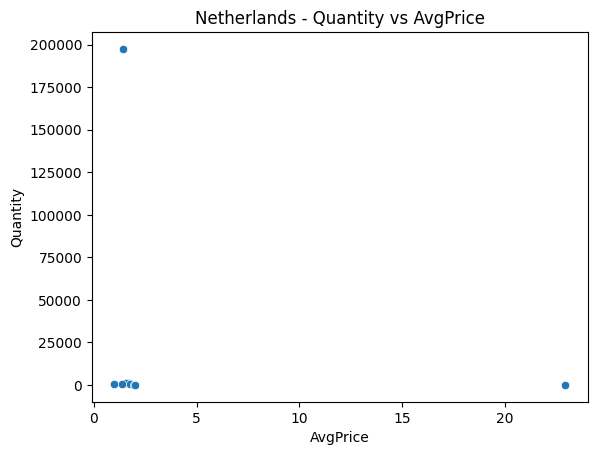

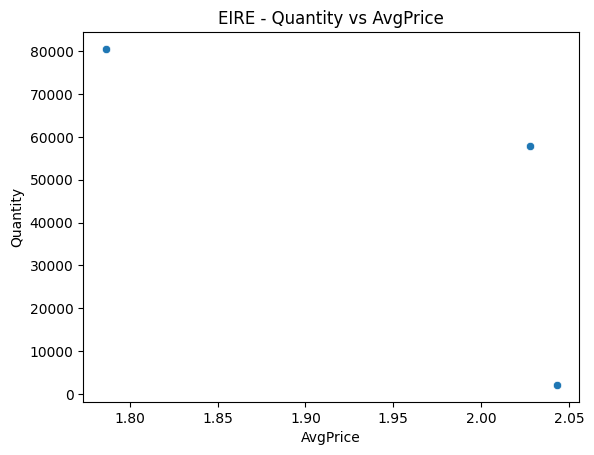

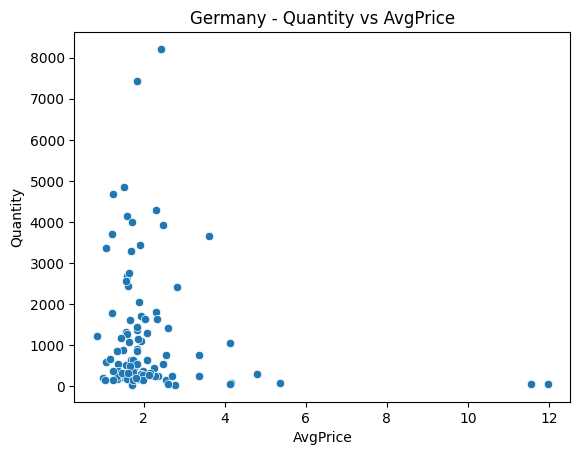

In [16]:
for country in top3:
    temp = grouped[grouped['Country'] == country]
    sns.scatterplot(data=temp, x='AvgPrice', y='Quantity')
    plt.title(f'{country} - Quantity vs AvgPrice')
    plt.show()

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

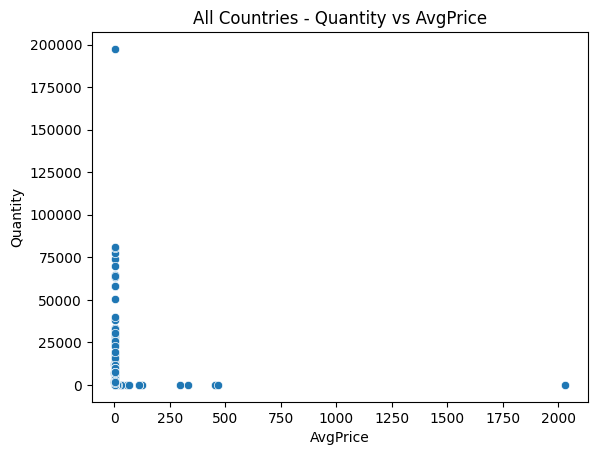

In [17]:
sns.scatterplot(data=grouped, x='AvgPrice', y='Quantity')
plt.title('All Countries - Quantity vs AvgPrice')
plt.show()

##### Step 7.4.2 Zoom in so we can see that curve more clearly

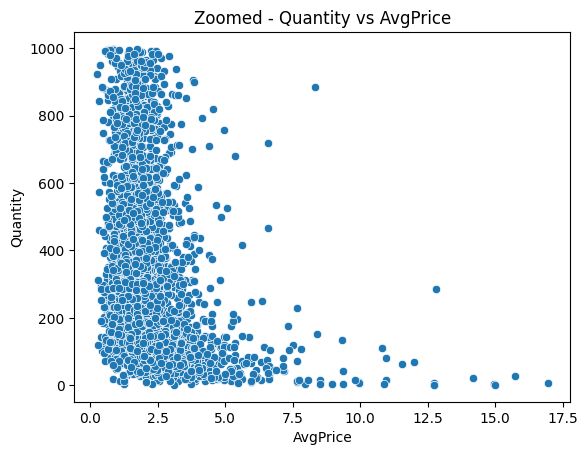

In [18]:
filtered = grouped[(grouped['AvgPrice'] < 20) & (grouped['Quantity'] < 1000)]
sns.scatterplot(data=filtered, x='AvgPrice', y='Quantity')
plt.title('Zoomed - Quantity vs AvgPrice')
plt.show()

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [19]:
bins = pd.cut(online_rt['UnitPrice'], bins=range(0, 51))
rev_grouped = online_rt.groupby(bins).agg({'Quantity':'sum', 'Revenue':'sum'}).reset_index()

/tmp/ipython-input-19-3694199536.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rev_grouped = online_rt.groupby(bins).agg({'Quantity':'sum', 'Revenue':'sum'}).reset_index()


#### 8.3 Plot.

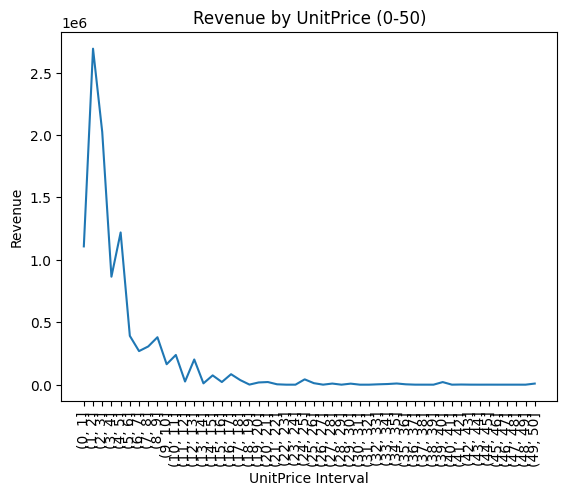

In [20]:
plt.plot(rev_grouped['UnitPrice'].astype(str), rev_grouped['Revenue'])
plt.xticks(rotation=90)
plt.title('Revenue by UnitPrice (0-50)')
plt.xlabel('UnitPrice Interval')
plt.ylabel('Revenue')
plt.show()

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

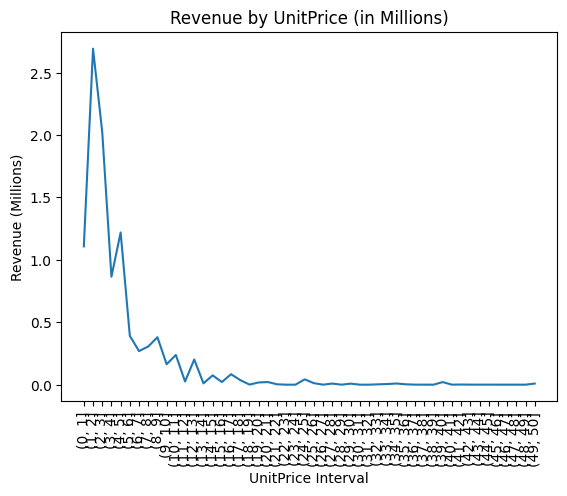

In [21]:
plt.plot(rev_grouped['UnitPrice'].astype(str), rev_grouped['Revenue'] / 1e6)
plt.xticks(rotation=90)
plt.title('Revenue by UnitPrice (in Millions)')
plt.xlabel('UnitPrice Interval')
plt.ylabel('Revenue (Millions)')
plt.show()

### BONUS: Create your own question and answer it.

In [22]:
print(online_rt['Description'].value_counts().head(1))

Description
WHITE HANGING HEART T-LIGHT HOLDER    2327
Name: count, dtype: int64
